**Assignment - EDA using Pandas**

***Instructions***
- Clone a copy of the assignment notebook in Google Colab.
- **Complete the tasks by filling in the code where indicated by TODO comments. Put each task in a new cell.**
- Run each cell to ensure your code works correctly.
- Pay attention to the output of each cell and interpret the results.
- For visualisation tasks, make sure to label axes, add titles, and choose appropriate colour schemes.
- After completing all tasks, review your findings and include notes of your insights gained from the EDA process as markdown notes for assessments.


In [2]:
#Cloning
!git clone https://github.com/ayobellobia/colab-git-assignment2.git

Cloning into 'colab-git-assignment2'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 13.38 KiB | 472.00 KiB/s, done.
Resolving deltas: 100% (1/1), done.


In [1]:
# Titanic Dataset Exploratory Data Analysis

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Task 1: Load the Titanic dataset
# TODO: Load the Titanic dataset from the following URL
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)

In [9]:
# Task 2: Inspect the data
# TODO: Display the first 5 rows of the dataset
print("Data First Few Rows:\n", df.head())

# TODO: Display the last 5 rows of the dataset
print("\nData Last Rows:\n",df.tail())

# TODO: Display the data types of each column
print("\nData Types:\n",df.dtypes)

# TODO: Display summary statistics of the numerical columns
print("\nData Summary Statistics:\n",df.describe())

Data First Few Rows:
    Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  

Data Last Rows:
      Survived  Pclass                            Name

In [11]:
# Task 3: Clean and preprocess the data

# TODO: Create a new categorical feature 'PclassCategory' from 'Pclass'
df['PclassCategory'] = df['Pclass'].map({1: 'First', 2: 'Second', 3: 'Third'})

# TODO: Handle missing values in the 'Age' column (use mean age)
df['Age'].fillna(df['Age'].mean(), inplace=True)

# TODO: Create a 'Family' feature by combining 'SibSp' and 'Parch'
df['Family'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard']

/tmp/ipython-input-1430205120.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [12]:
# Task 4: Identify specific data points

# TODO: Find passengers with the highest fare
highest_fare_passengers = df[df['Fare'] == df['Fare'].max()]
print("\nPassengers with Highest Fare:\n",highest_fare_passengers)

# TODO: Find passengers with the largest family size
largest_family_passengers = df[df['Family'] == df['Family'].max()]
print("\nPassengers with Largest Family Size:\n",largest_family_passengers)


Passengers with Highest Fare:
      Survived  Pclass                               Name     Sex   Age  \
257         1       1                    Miss. Anna Ward  female  35.0   
676         1       1  Mr. Thomas Drake Martinez Cardeza    male  36.0   
733         1       1              Mr. Gustave J Lesurer    male  35.0   

     Siblings/Spouses Aboard  Parents/Children Aboard      Fare  \
257                        0                        0  512.3292   
676                        0                        1  512.3292   
733                        0                        0  512.3292   

    PclassCategory  Family  
257          First       0  
676          First       1  
733          First       0  

Passengers with Largest Family Size:
      Survived  Pclass                         Name     Sex   Age  \
158         0       3    Master. Thomas Henry Sage    male   5.0   
179         0       3  Miss. Constance Gladys Sage  female   8.0   
200         0       3           Mr. Frederi

In [13]:
# Task 5: Demonstrate Pandas Series and DataFrame functionalities

# TODO: Create a Pandas Series of passenger names
names_series = df['Name']

# TODO: Create a DataFrame of passenger names and ages
names_ages_df = df[['Name', 'Age']]

# TODO: Slice the DataFrame to show only passengers older than 50
older_passengers = df[df['Age'] > 50]


In [15]:
# Task 6: Introduce multi-indexing

# TODO: Create a multi-index DataFrame grouped by 'Sex' and 'Pclass'
multi_index_df = df.groupby(['Sex', 'Pclass']).mean(numeric_only=True)

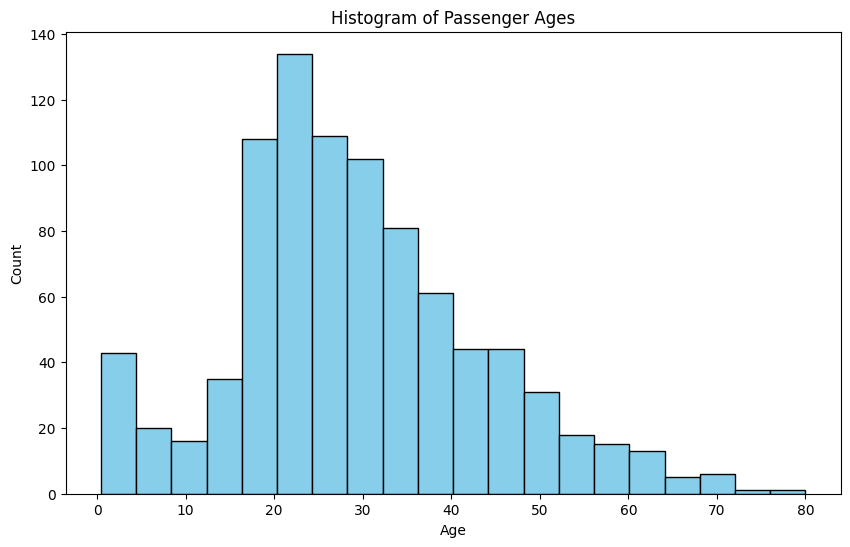

/tmp/ipython-input-457906176.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')


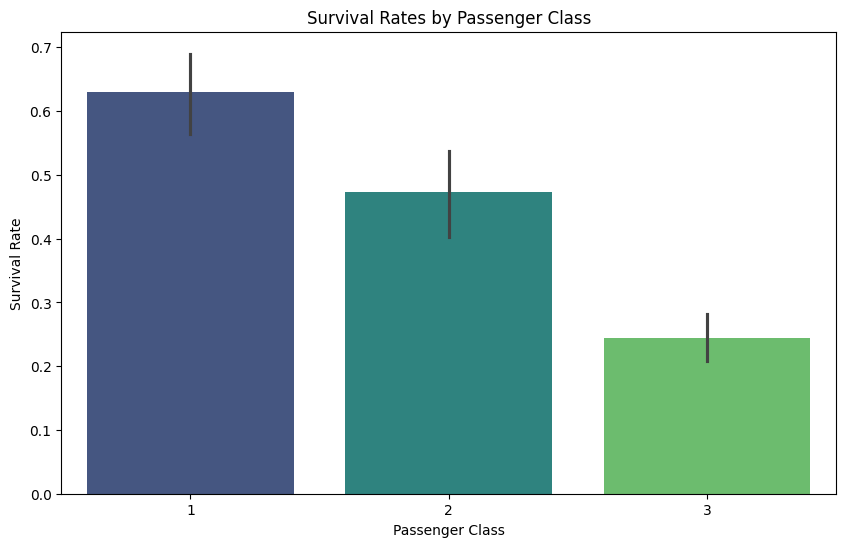

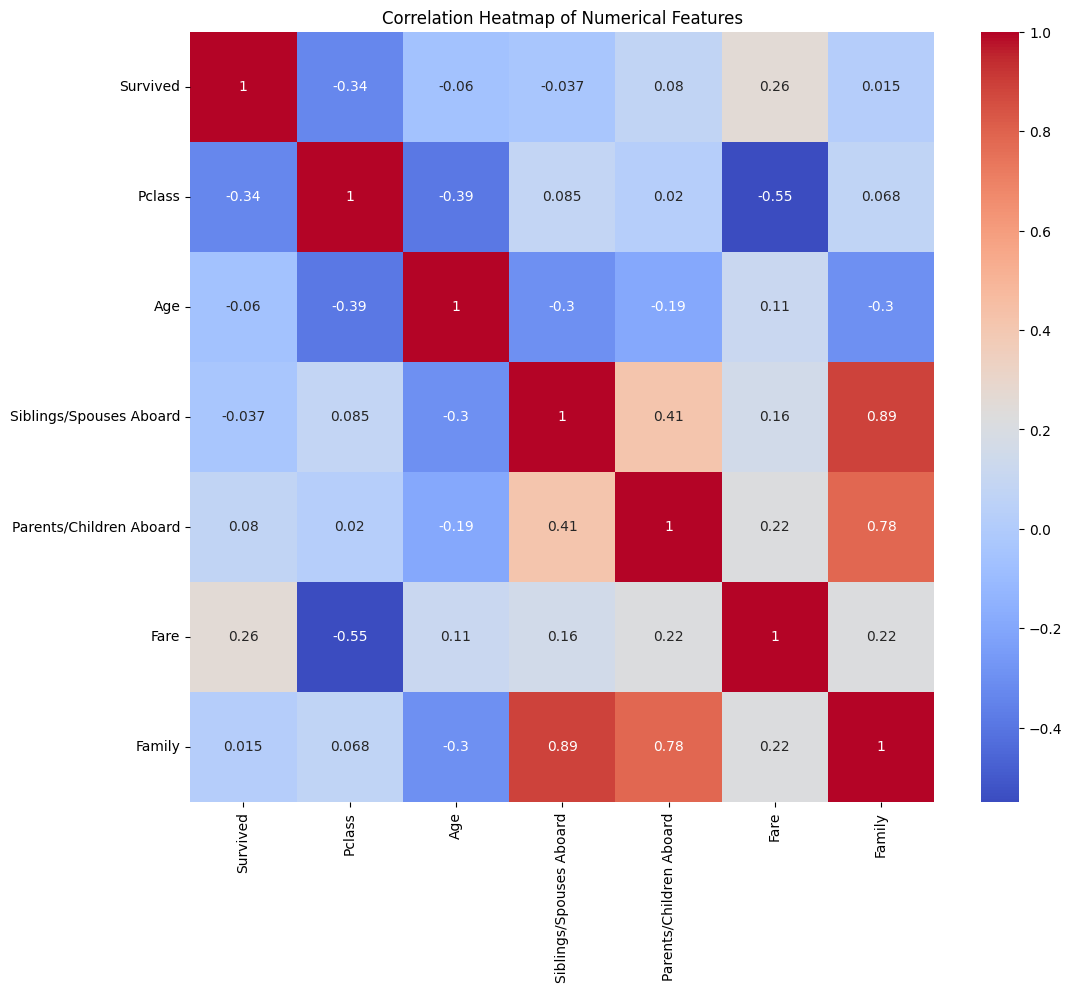

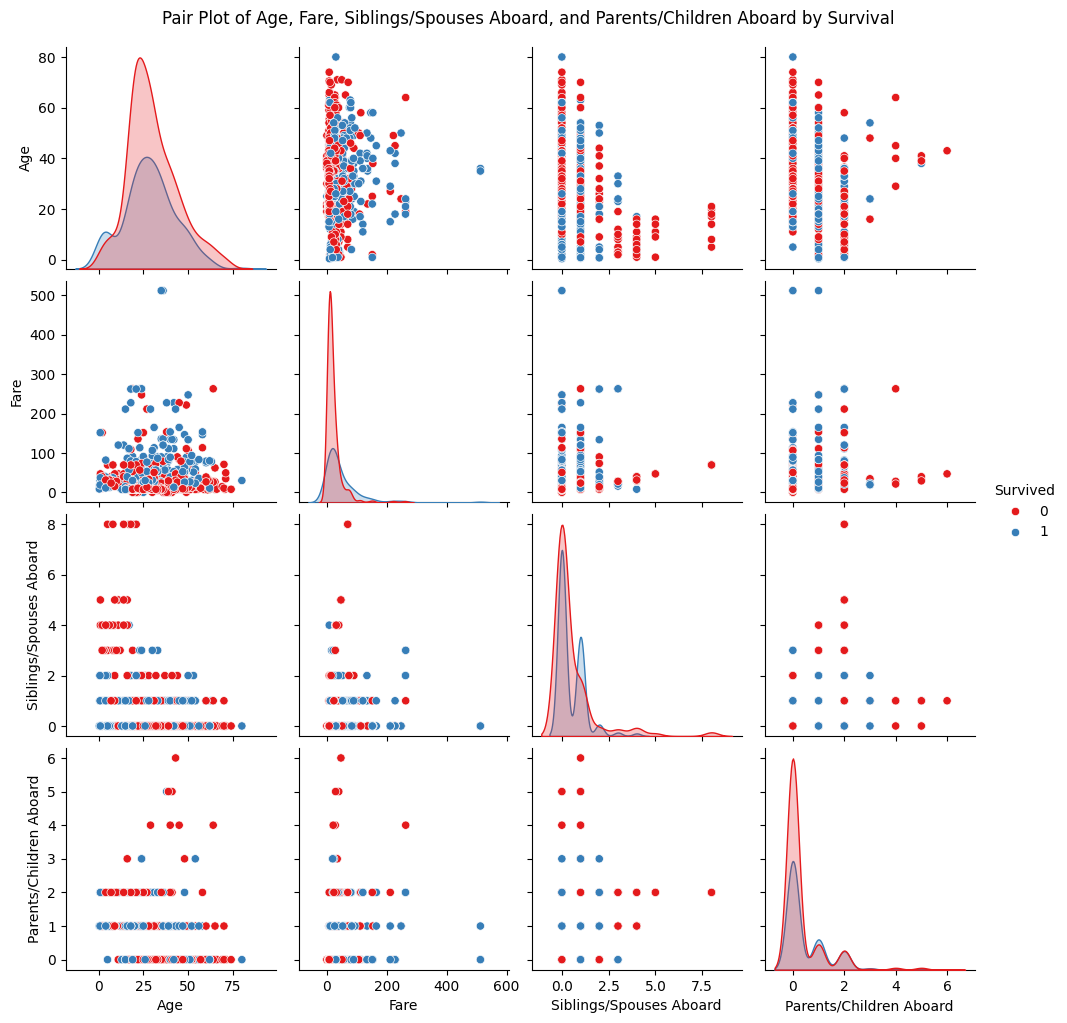

In [16]:
# Task 7: Visualizations

# TODO: Create a histogram of passenger ages
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# TODO: Create a bar plot of survival rates by passenger class
plt.figure(figsize=(10,6))
sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# TODO: Create a heatmap of correlation between numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# TODO: Create a pair plot of 'Age', 'Fare', 'SibSp', and 'Parch', colored by 'Survived'
sns.pairplot(df[['Age', 'Fare', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Survived']], hue='Survived', palette='Set1')
plt.suptitle('Pair Plot of Age, Fare, Siblings/Spouses Aboard, and Parents/Children Aboard by Survival', y=1.02)
plt.show()

In [17]:
# Task 8: Analyze survival rates

# TODO: Calculate and display survival rates by sex
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print("\nSurvival Rates by Sex:\n",survival_by_sex)

# TODO: Calculate and display survival rates by passenger class
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rates by Passenger Class:\n",survival_by_class)



Survival Rates by Sex:
 Sex
female    0.742038
male      0.190227
Name: Survived, dtype: float64

Survival Rates by Passenger Class:
 Pclass
1    0.629630
2    0.472826
3    0.244353
Name: Survived, dtype: float64


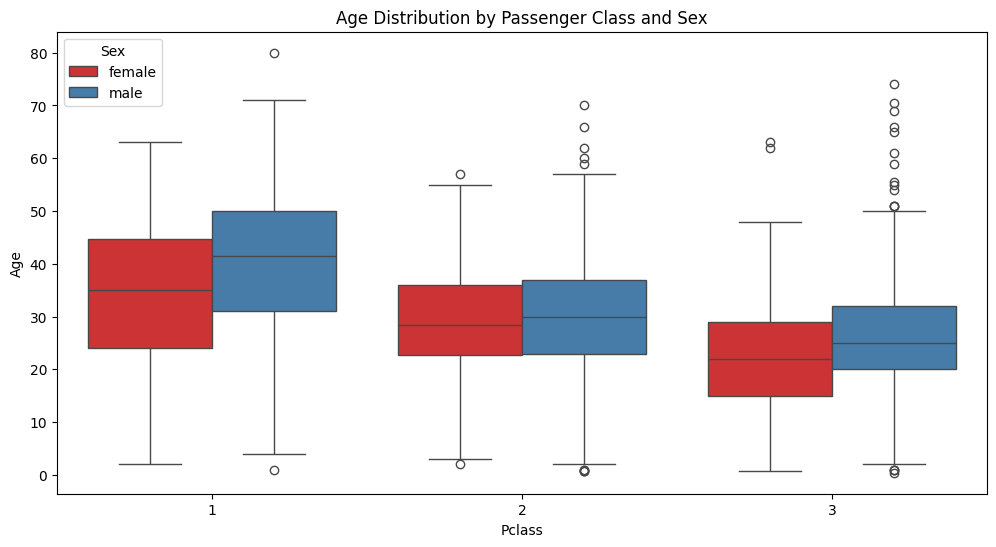

In [18]:
# Task 9: Analyze age distribution

# TODO: Create a box plot of age distribution by passenger class and sex
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df, palette='Set1')
plt.title('Age Distribution by Passenger Class and Sex')
plt.show()

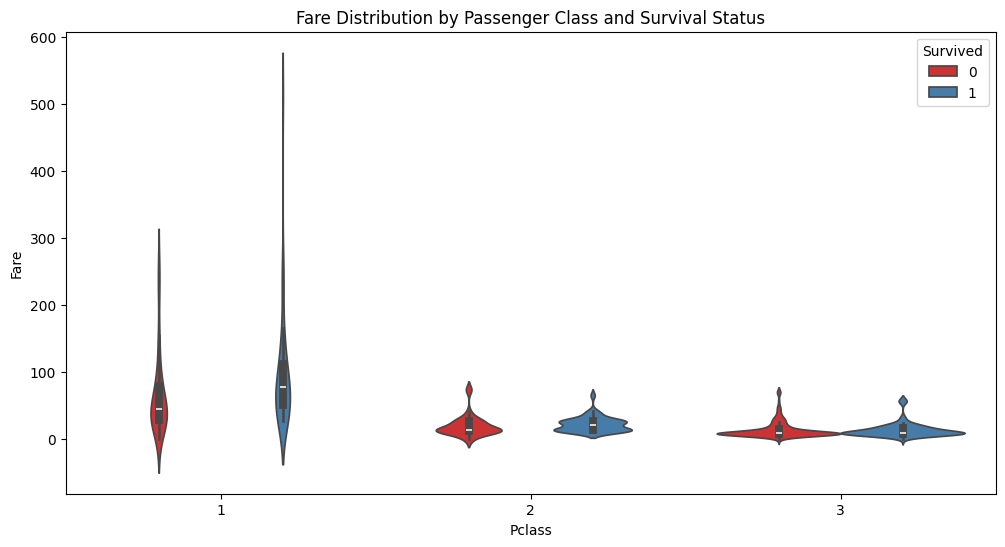

EDA tasks completed.


In [19]:
# Task 10: Analyze fare distribution

# TODO: Create a violin plot of fare distribution by passenger class and survival status
plt.figure(figsize=(12, 6))
sns.violinplot(x='Pclass', y='Fare', hue='Survived', data=df, palette='Set1')
plt.title('Fare Distribution by Passenger Class and Survival Status')
plt.show()

print("EDA tasks completed.")

In [20]:
!apt-get install -y git
!git config --global user.email "ayobello629@gmail.com"
!git config --global user.name "ayobellobia"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.15).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [22]:
# Move to working directory
%cd /content/colab-git-assignment2

/content/colab-git-assignment2


In [23]:
%pwd

'/content/colab-git-assignment2'

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [24]:
#Moving to working directory
!mv "/content/drive/MyDrive/Artificial Intelligence/Lesson_5_Assignment.ipynb" "/content/colab-git-assignment2/"

mv: cannot stat '/content/drive/MyDrive/Artificial Intelligence/Lesson_5_Assignment.ipynb': No such file or directory


In [21]:
# Adding and committing
!git add "Lesson_5_Assignment.ipynb"

#Git commit
!git commit -m "Adding assignment 5"

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
